
# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report is based on a dataset containing information about 10,000 movies collated from The Movie Database (TMDb). In this prjoects dataset exploration will be carried out based on certain criterias, a minimum of 3 independent variables(genre, production companies, revenue) and a dependent variable(Popularity). Exploration of these variables will help in answering questions related to factors which affect the success of a movie such as:
- Most popular genres in varying years?
- Properties associated with high revenue movies?
- Are certain production companies associated with high popularity of their movies?

In [550]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

General overview will be carried out on the document and any discrepancies spotted will be rectified in the "Data Cleaning" section.

### General Properties

In [551]:
# load data and print out first 5 lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [552]:
df.shape

(10866, 21)

The dataset has 10866 rows and 21 columns

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Making use of the info() method lets us get a general view of our data, from these we can see we hve a number of null values by subtracting the non-null numbers of our different columns from the total number of columns we saw above (10866). Null values will be investigated further. Also looking at the types, the release_date is in the object/string format rather than datetime. 

In [554]:
type(df['release_date'][0])

str

release_date is in string format, this would have to be converted in the Data Cleaning section.

Next we'll have a look at our null values to see if they're to be filled or deleted.

In [555]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

After looking through the above, it's safe to say we can get rid of columns with null values like imdb_id, homepage, tagline, keywords and overview, as these columns play no significant roles to our analysis.

We'll further check to ensure our data contains no duplicates:

In [556]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [557]:
df.duplicated().sum()

1

In [558]:
df[df.duplicated(keep=False) == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


There's a duplicate in the Id column, this would be deduped further down.

Additionally have a pipe separator character in genres, production_companies and cast columns.

### Data Cleaning: 
The following clean ups to be carried out within this data set
- Dropping null rows
- Deduping "id"
- Dropping columns which have no significant roles to play in our analysis (imdb_id, homepage, tagline, overview)
- Converting release_date type from string to datetime type
- splitting the genres, production companies and casts to get rid of the pipes
- Drop zero values from the revenue, budget and adjusted budget and revenue columns

In [559]:
# Dropping columns not relevant to our analysis
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [560]:
# Drop all rows with null values
df.dropna(axis = 0, inplace=True)

In [561]:
# Confirm null values have been dropped
df.isnull().sum().any()

False

In [562]:
# Confrim changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   int64  
 3   revenue               9773 non-null   int64  
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   int64  
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  release_date          9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
 14  budget_adj            9773 non-null   float64
 15  revenue_adj         

In [563]:
df.shape

(9773, 16)

All null values have been dropped including the columns we don't require. Lets have a look at part of our table to ensure there are no null values.

In [766]:
df.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
10861,21,0.080598,3.148899e+07,9.097629e+07,The Endless Summer,Michael Hynson,Bruce Brown,95.0,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,3.778635e+07,1.173487e+08,Medium
10862,20379,0.065543,3.148899e+07,9.097629e+07,Grand Prix,James Garner,John Frankenheimer,176.0,Action,Cherokee Productions,2066-12-21,20,5.7,1966,3.778635e+07,1.173487e+08,Medium
10863,39768,0.065141,3.148899e+07,9.097629e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy,Eldar Ryazanov,94.0,Mystery,Mosfilm,2066-01-01,11,6.5,1966,3.778635e+07,1.173487e+08,Medium
10864,21449,0.064317,3.148899e+07,9.097629e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi,Woody Allen,80.0,Action,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,3.778635e+07,1.173487e+08,Medium
10865,22293,0.035919,1.900000e+04,9.097629e+07,Manos: The Hands of Fate,Harold P. Warren,Harold P. Warren,74.0,Horror,Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,1.173487e+08,Medium


From the above we can still see our set contains a number of "0" values in certain columns: budget, revenue and their respective adjusted columns. Investigate this further by getting the exact number of 0's in each of the columns. 

In [565]:
df.eq(0).sum()

id                         0
popularity                 0
budget                  4751
revenue                 5022
original_title             0
cast                       0
director                   0
runtime                   13
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              4751
revenue_adj             5022
dtype: int64

We have 4751 and 5022 null values respectively, this is approximately 43% and 46% of the entire 10866 entries. For this reason we'll fill this values by making use of the mean consdiering they're numerical values, had they been categorical values the "mode" would have been made use of. Additionally, it appears we have 13 '0' values in the runtime column also at 1.3% of the total entries therefore it'll equally be filled making use of the mean.

In [566]:
df[df['runtime'] == 0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
1289,286372,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0
3329,20414,0.082898,0,0,"Grande, grosso e Verdone",Carlo Verdone|Claudia Gerini|Eva Riccobono|Vit...,Carlo Verdone,0,Family,Filmauro,3/7/08,35,5.3,2008,0.000000e+00,0.0
3857,289097,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,Stephen Kay,0,Horror,Access Motion Pictures,6/10/11,13,5.2,2011,0.000000e+00,0.0
4944,158150,0.026459,0,0,How to Fall in Love,Brooke D'Orsay|Eric Mabius|Jody Thompson|Gina ...,Mark Griffiths,0,Comedy|Romance|TV Movie,Annuit Coeptis Entertainment Inc.|Annuit Coept...,7/21/12,11,4.7,2012,0.000000e+00,0.0
5695,224815,0.417739,0,0,Skinwalker Ranch,Steve Berg|Kyle Davis|Erin Cahill|Jon Gries|De...,Devin McGinn,0,Thriller|Horror|Science Fiction,DeepStudios,10/30/13,27,4.3,2013,0.000000e+00,0.0


To fill up these values, they'll first be converted to 'nan' and then filled with their mean values.

In [567]:
df[df.eq(0)] = np.nan

In [568]:
df.eq(0).sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [569]:
nan_columns = df.loc[:, ('revenue', 'budget', 'runtime', 'revenue_adj', 'budget_adj')]

In [570]:
mean_values = nan_columns.mean()
mean_values

revenue        9.097629e+07
budget         3.148899e+07
runtime        1.030626e+02
revenue_adj    1.173487e+08
budget_adj     3.778635e+07
dtype: float64

In [571]:
nan_columns.fillna(mean_values, inplace=True)

In [573]:
df.revenue = nan_columns.revenue
df.budget = nan_columns.budget
df.runtime = nan_columns.runtime
df.budget_adj = nan_columns.budget_adj
df.revenue_adj = nan_columns.revenue_adj

In [765]:
df.tail()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
10861,21,0.080598,3.148899e+07,9.097629e+07,The Endless Summer,Michael Hynson,Bruce Brown,95.0,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,3.778635e+07,1.173487e+08,Medium
10862,20379,0.065543,3.148899e+07,9.097629e+07,Grand Prix,James Garner,John Frankenheimer,176.0,Action,Cherokee Productions,2066-12-21,20,5.7,1966,3.778635e+07,1.173487e+08,Medium
10863,39768,0.065141,3.148899e+07,9.097629e+07,Beregis Avtomobilya,Innokentiy Smoktunovskiy,Eldar Ryazanov,94.0,Mystery,Mosfilm,2066-01-01,11,6.5,1966,3.778635e+07,1.173487e+08,Medium
10864,21449,0.064317,3.148899e+07,9.097629e+07,"What's Up, Tiger Lily?",Tatsuya Mihashi,Woody Allen,80.0,Action,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,3.778635e+07,1.173487e+08,Medium
10865,22293,0.035919,1.900000e+04,9.097629e+07,Manos: The Hands of Fate,Harold P. Warren,Harold P. Warren,74.0,Horror,Norm-Iris,2066-11-15,15,1.5,1966,1.276423e+05,1.173487e+08,Medium


In [575]:
df.eq(0).sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9773 non-null   int64  
 1   popularity            9773 non-null   float64
 2   budget                9773 non-null   float64
 3   revenue               9773 non-null   float64
 4   original_title        9773 non-null   object 
 5   cast                  9773 non-null   object 
 6   director              9773 non-null   object 
 7   runtime               9773 non-null   float64
 8   genres                9773 non-null   object 
 9   production_companies  9773 non-null   object 
 10  release_date          9773 non-null   object 
 11  vote_count            9773 non-null   int64  
 12  vote_average          9773 non-null   float64
 13  release_year          9773 non-null   int64  
 14  budget_adj            9773 non-null   float64
 15  revenue_adj         

In [577]:
# Dedupe ID
df.drop_duplicates(inplace=True)

In [578]:
# Check duplicate has been dropped
df.duplicated().sum()

0

In [579]:
# convert release_date type from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [580]:
# Confirm change to type
type(df['release_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [581]:
# Split above mentioned columns
split_columns = ['cast', 'genres', 'production_companies']

for p in split_columns:
    df[p] = df[p].apply(lambda x: x.split("|")[0])

Now lets have a look and our cleaned dataset visually

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9772 non-null   int64         
 1   popularity            9772 non-null   float64       
 2   budget                9772 non-null   float64       
 3   revenue               9772 non-null   float64       
 4   original_title        9772 non-null   object        
 5   cast                  9772 non-null   object        
 6   director              9772 non-null   object        
 7   runtime               9772 non-null   float64       
 8   genres                9772 non-null   object        
 9   production_companies  9772 non-null   object        
 10  release_date          9772 non-null   datetime64[ns]
 11  vote_count            9772 non-null   int64         
 12  vote_average          9772 non-null   float64       
 13  release_year     

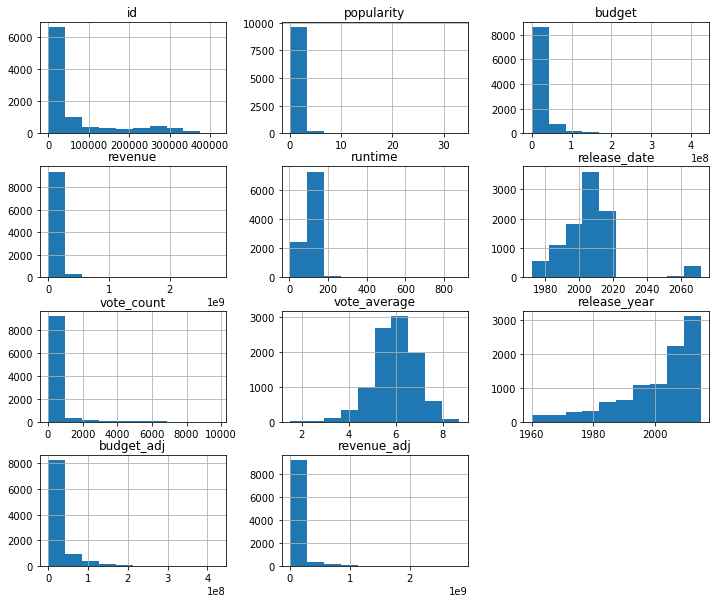

In [583]:
df.hist(figsize=(12, 10));

With this initial data we can deduce the following:
- Popularity scale is highly concentrated between 0-5
- release year skewed to the left, showing the dataset having more movies in the 2000s
- Outlier in the reease date capturing 2060

<a id='eda'></a>
## Exploratory Data Analysis

Our Dataset will be explored further looking for trends and answer to the questions stated above. 

### Research Question 1 (Most popular genre through the different years?)

In [584]:
df.genres.describe()

count      9772
unique       20
top       Drama
freq       2223
Name: genres, dtype: object

There are 20 unique genres and Drama has the highest frequency in this dataset.

We'll explore the data further to get the popular genres for each year 

In [585]:
# Create dataframe for genre
df_genres = df.groupby(['genres', 'release_year'], as_index=False)['popularity'].max()
df_genres

,genres,release_year,popularity
0,Action,1960,1.872132
1,Action,1961,0.754548
2,Action,1962,0.613969
3,Action,1963,2.508235
4,Action,1964,0.306872
...,...,...,...
808,Western,2006,0.463068
809,Western,2007,1.150389
810,Western,2013,0.393664
811,Western,2014,0.900955


In [586]:
# Get maximum Genre popularity for each year 
df_year_pop_gen = df_genres.groupby(['release_year'])['popularity','genres'].max()
df_year_pop_gen

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9360\3640947404.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_year_pop_gen = df_genres.groupby(['release_year'])['popularity','genres'].max()


,popularity,genres
release_year,,
1960,2.610362,Thriller
1961,2.631987,Western
1962,3.170651,Western
1963,2.508235,Romance
1964,3.153791,Western
1965,1.910465,War
1966,1.227582,Western
1967,2.550704,Western
1968,3.309196,Western


Now it's been sorted by year, showing maximum popularity and genre, let's get the statistical summary below:

In [685]:
df_year_pop_gen.genres.describe()

count          56
unique          4
top       Western
freq           28
Name: genres, dtype: object

In [686]:
top_genres =df_year_pop_gen.groupby(['genres']).max()

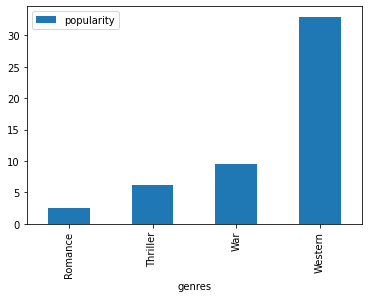

In [693]:
top_genres.plot(kind='bar');

### Research Question 2  (What properties are associated with high revenue movies?)

In [694]:
# Statistical description of revenue
df.revenue.describe()

count    9.772000e+03
mean     9.098550e+07
std      1.138393e+08
min      2.000000e+00
25%      3.526309e+07
50%      9.097629e+07
75%      9.097629e+07
max      2.781506e+09
Name: revenue, dtype: float64

Let's consider high revenue movies to be from 75% above. Therefore create a df based on this using the "cut" function

In [695]:
bin_edges = [ 2.000000e+00, 3.526309e+07, 9.097629e+07, 2.781506e+09]

In [696]:
bin_names = ['Low', 'Medium', 'High']

In [697]:
df['revenue_level'] = pd.cut(df['revenue'], bin_edges, labels=bin_names)

In [618]:
high_revenue = df[df['revenue_level'] == 'High']

In [699]:
# stream line high revenue dataframe to look at precise properties
high_revenue = high_revenue[['original_title', 'genres', 'production_companies','director','popularity', 'vote_count', 'vote_average', 'revenue']]

In [700]:
high_revenue.revenue.max()

2781505847.0

In [701]:
high_revenue[high_revenue['revenue'] == 2781505847.0]

,original_title,genres,production_companies,director,popularity,vote_count,vote_average,revenue
1386,Avatar,Action,Ingenious Film Partners,James Cameron,9.432768,8458,7.1,2.781506e+09


#### Action Movie "Avatar" by Director James Cameron under production company "Ingenious FIlm partners" generated the overall highest revenue.

I'll take a look at what other high revenue movies Ingenious Film Partner produced. 

In [708]:
# Get movies by Ingenious Film Partners
high_revenue[high_revenue['production_companies'] == 'Ingenious Film Partners'].describe()

,popularity,vote_count,vote_average,revenue
count,10.000000,10.000000,10.00000,1.000000e+01
mean,2.367246,2668.400000,6.27000,5.957594e+08
std,2.636017,2363.314772,0.74692,7.812153e+08
min,0.164515,536.000000,4.80000,1.586742e+08
25%,1.280604,1229.500000,6.05000,2.592280e+08
50%,1.715430,1591.500000,6.25000,3.427760e+08
75%,2.291855,3434.250000,6.90000,5.267435e+08
max,9.432768,8458.000000,7.10000,2.781506e+09


In [709]:
# Get statitcal count of high revenue production companies
high_revenue.production_companies.value_counts()

Universal Pictures                        129
Paramount Pictures                        125
Columbia Pictures                          94
Twentieth Century Fox Film Corporation     81
Walt Disney Pictures                       80
                                         ... 
Bac Films                                   1
Kennedy/Marshall Company, The               1
MPH Entertainment                           1
Geffen Pictures                             1
Robert Wise Productions                     1
Name: production_companies, Length: 229, dtype: int64

In [710]:
high_revenue.production_companies.describe()

count                   1303
unique                   229
top       Universal Pictures
freq                     129
Name: production_companies, dtype: object

#### Ingenious Film Partners produced the single highest revenue movie but only only 10 of the 1303 high revenue movies, however  Universal Pictures appears to be the production company with the highest number of high revenue movies.

In [711]:
high_revenue.original_title.describe()

count         1303
unique        1297
top       Hercules
freq             2
Name: original_title, dtype: object

There are 2 movies titled "Hercules" we'll look into this further. 

In [712]:
df[df['original_title'] == 'Hercules']

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
685,184315,2.549403,1.000000e+08,243400000.0,Hercules,Dwayne Johnson,Brett Ratner,99.0,Action,Paramount Pictures,2014-07-23,1215,5.6,2014,9.210911e+07,2.241936e+08,High
5232,11970,3.488910,8.500000e+07,252712101.0,Hercules,Tate Donovan,John Musker|Ron Clements,93.0,Animation,Walt Disney Pictures,1997-06-26,909,7.0,1997,1.154691e+08,3.432994e+08,High
8063,26452,0.095316,3.148899e+07,10676194.0,Hercules,Lou Ferrigno,Luigi Cozzi,98.0,Action,Golan-Globus Productions,1983-08-12,10,3.1,1983,3.778635e+07,2.337352e+07,Low


#### In total there are actually 3 movies titled Hercules in our dataset, however only 2 of the 3 are high revenue movies all by 3 different production companies and Casts, showing no corelation.

In [718]:
hercules = high_revenue[high_revenue['original_title'] == 'Hercules']
hercules = hercules.set_index('original_title')

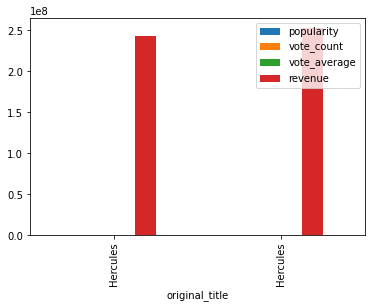

In [721]:
hercules.plot(kind='bar');

#### Comparing both high revenue movies, the following can be tentatively deduced:
    - High popularity index above 75th percentile
    - Genres (Action and Animation) are however not part of the top 4 genres in terms of popolarity through the years
    - High vote_counts and vote_average above 75th percentile
    
I'll go ahead and compare the high revenue movies

#### Let's take a look at the genres for high revenue movies

In [633]:
high_revenue.genres.describe()

count       1303
unique        18
top       Action
freq         267
Name: genres, dtype: object

In [634]:
high_revenue.genres.unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Thriller',
       'Fantasy', 'Animation', 'Horror', 'History', 'Mystery', 'Music',
       'Documentary'], dtype=object)

In [497]:
high_revenue.vote_average.describe()

count    1303.000000
mean        6.363162
std         0.706059
min         4.100000
25%         5.900000
50%         6.300000
75%         6.900000
max         8.300000
Name: vote_average, dtype: float64

In [498]:
high_revenue[high_revenue['genres'] == 'Action'].describe()

,popularity,vote_count,vote_average
count,267.000000,267.000000,267.000000
mean,2.458982,1493.868914,6.254682
std,3.190717,1573.135295,0.703861
min,0.131526,33.000000,4.100000
25%,1.028084,361.500000,5.800000
50%,1.554808,951.000000,6.200000
75%,2.640180,2038.000000,6.700000
max,32.985763,9767.000000,8.000000


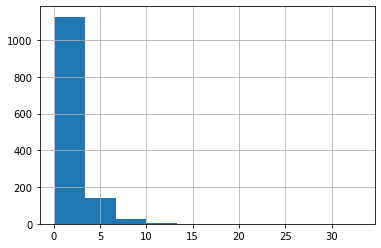

In [741]:
high_revenue.popularity.hist();

<AxesSubplot:>

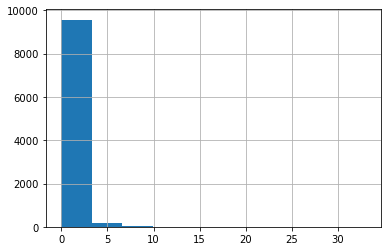

In [742]:
df.popularity.hist()

    - Most frequent genre for high revenue movies - Action, although not part of the top 4 genres through the year.
    - A relatively average popularity index, albeit part of the 75th percentile
    - Relatively high vote count and vote_average

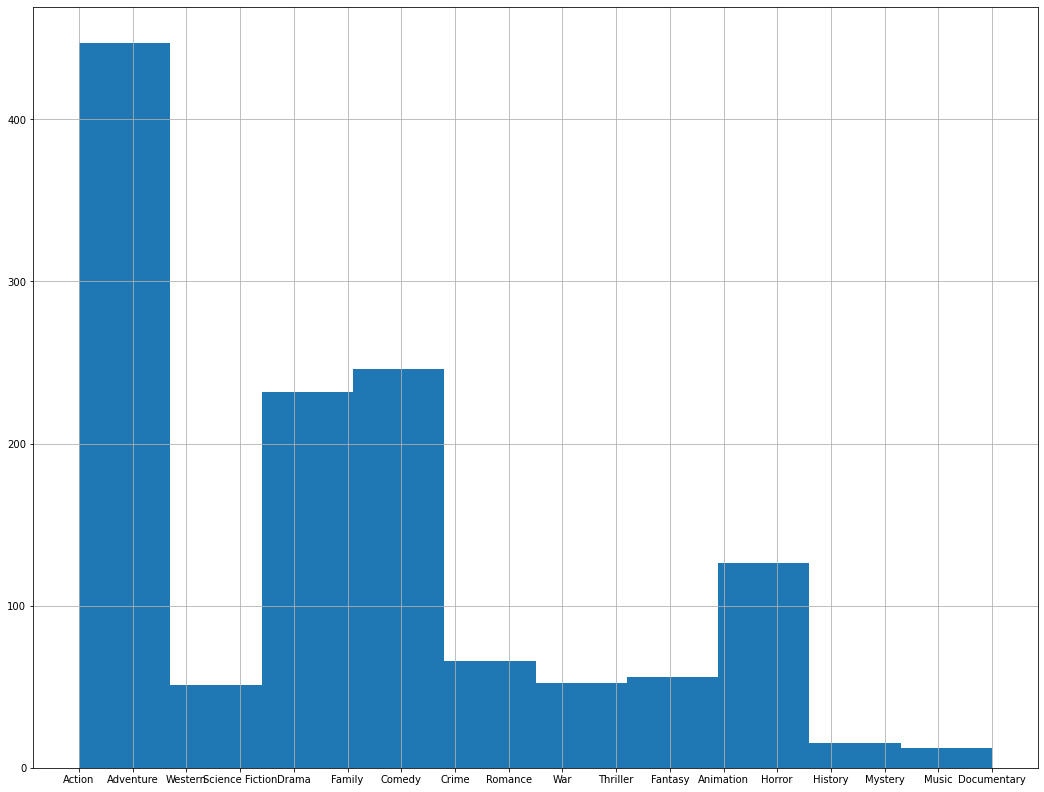

In [638]:
high_revenue.genres.hist(figsize=(18,14));

## Question 3: Top 20 directors of high revenue movies?

In [641]:
high_revenue.director.describe()

count                 1303
unique                 604
top       Steven Spielberg
freq                    23
Name: director, dtype: object

While director Steven Spielberg appears to be the highest direcotr of high revenue movies, we'll make a top 20 rating

In [662]:
top_directors = high_revenue.groupby(['director'])['revenue'].sum()
top_directors

director
Adam McKay             7.685023e+08
Adam Shankman          6.824671e+08
Adrian Lyne            7.988187e+08
Alan J. Pakula         5.573788e+08
Alan Metter            9.125800e+07
                           ...     
Wolfgang Petersen      1.686854e+09
Wolfgang Reitherman    2.058436e+08
Woody Allen            3.450334e+08
Xavier Gens            9.996575e+07
Zack Snyder            1.513145e+09
Name: revenue, Length: 604, dtype: float64

In [664]:
top_20_directors = top_directors.nlargest(n=20)
top_20_directors

director
Steven Spielberg     8.825873e+09
Peter Jackson        6.490594e+09
James Cameron        5.656483e+09
Michael Bay          4.831033e+09
David Yates          4.154296e+09
Christopher Nolan    4.127825e+09
Robert Zemeckis      3.710221e+09
Chris Columbus       3.693961e+09
J.J. Abrams          3.579170e+09
Gore Verbinski       3.447007e+09
Roland Emmerich      3.393138e+09
Tim Burton           3.381885e+09
George Lucas         3.314114e+09
Ridley Scott         3.255894e+09
Francis Lawrence     3.179980e+09
Ron Howard           3.057079e+09
Sam Raimi            2.988215e+09
Joss Whedon          2.924594e+09
Sam Mendes           2.623424e+09
Carlos Saldanha      2.532452e+09
Name: revenue, dtype: float64

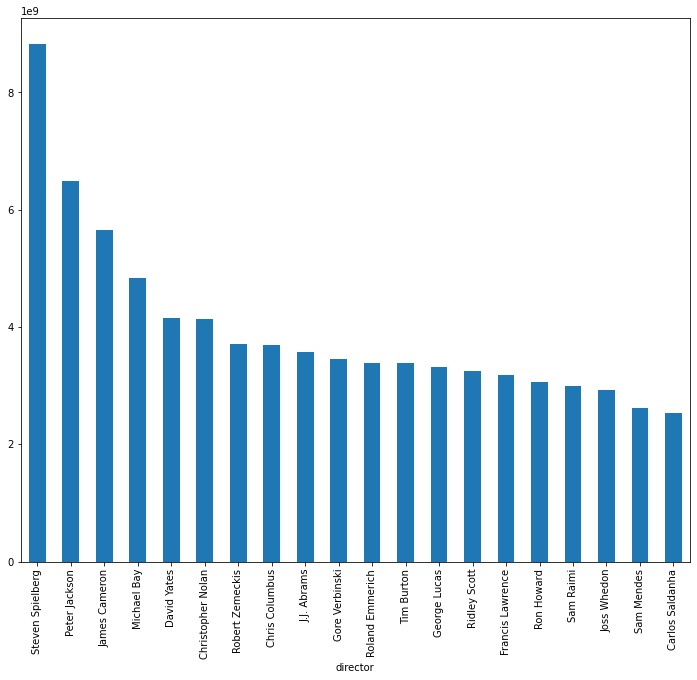

In [668]:
top_20_directors.plot(kind='bar', figsize=(12, 10));

### Question 4 Top 20 Production companies of high revenue movies?

In [669]:
high_revenue.production_companies.describe()

count                   1303
unique                   229
top       Universal Pictures
freq                     129
Name: production_companies, dtype: object

In [670]:
top_production = high_revenue.groupby(['production_companies'])['revenue'].sum()
top_production

production_companies
1492 Pictures              2.817547e+09
20th Century Fox           2.458724e+09
Aardman Animations         1.924528e+08
Alcon Entertainment        8.806589e+08
Alliance Films             9.700915e+07
                               ...     
Wildwood Enterprises       1.868836e+08
WingNut Films              6.701413e+09
Woods Entertainment        1.730467e+08
Working Title Films        1.212019e+08
Worldview Entertainment    1.032151e+08
Name: revenue, Length: 229, dtype: float64

In [671]:
top_20_production = top_production.nlargest(n=20)
top_20_production

production_companies
Universal Pictures                        3.289217e+10
Paramount Pictures                        3.282513e+10
Walt Disney Pictures                      3.042266e+10
Columbia Pictures                         2.507462e+10
Twentieth Century Fox Film Corporation    1.926270e+10
New Line Cinema                           1.104816e+10
Village Roadshow Pictures                 1.063733e+10
DreamWorks SKG                            9.821306e+09
Marvel Studios                            8.650272e+09
Lucasfilm                                 8.477126e+09
Warner Bros.                              8.010269e+09
DreamWorks Animation                      7.678022e+09
WingNut Films                             6.701413e+09
Columbia Pictures Corporation             5.963357e+09
Ingenious Film Partners                   5.957594e+09
Summit Entertainment                      5.450116e+09
Legendary Pictures                        5.334725e+09
Eon Productions                           4.

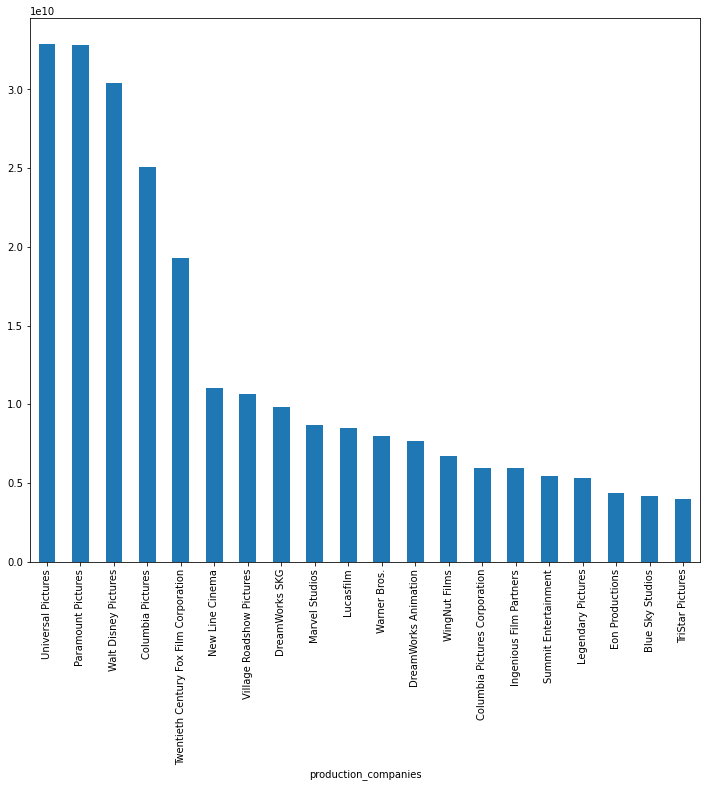

In [672]:
top_20_production.plot(kind='bar', figsize=(12, 10));

<a id='conclusions'></a>
## Conclusions

### 1. Popular Genres over the Years 1960-2015:
Most popular genre between 1960 and 2015 is "Thriller", with "Western" carrying the overall popularity vote in the dataset of approximately 32. Below we can see the distribution of the top genres.

In [678]:
overall_pop_genres = df_year_pop_gen.groupby('genres')['popularity'].sum()

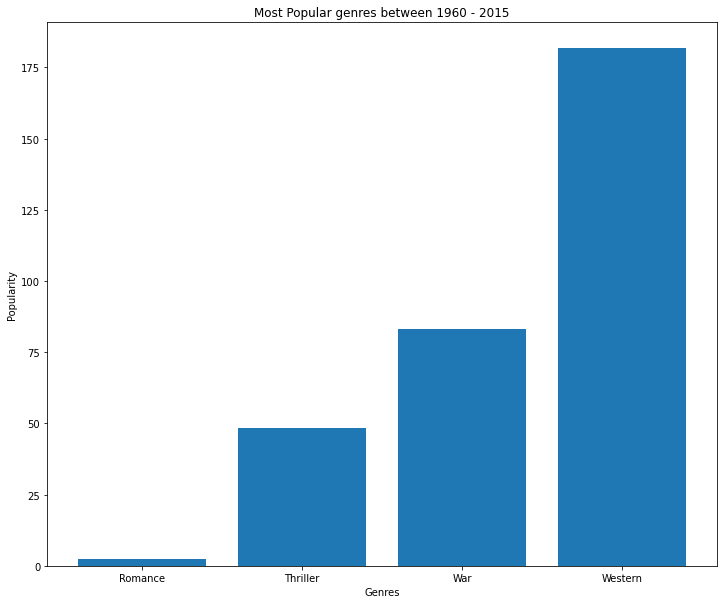

In [679]:
plt.subplots(figsize=(12,10))
plt.bar(overall_pop_genres.index, overall_pop_genres)
plt.title('Most Popular genres between 1960 - 2015')
plt.xlabel('Genres')
plt.ylabel('Popularity');

### 2. Properties of high revenue movies:

#### 2.1 Movie Genre: Action movies are the more associated with high revenue movies as per distribution below

<AxesSubplot:xlabel='genres', ylabel='count'>

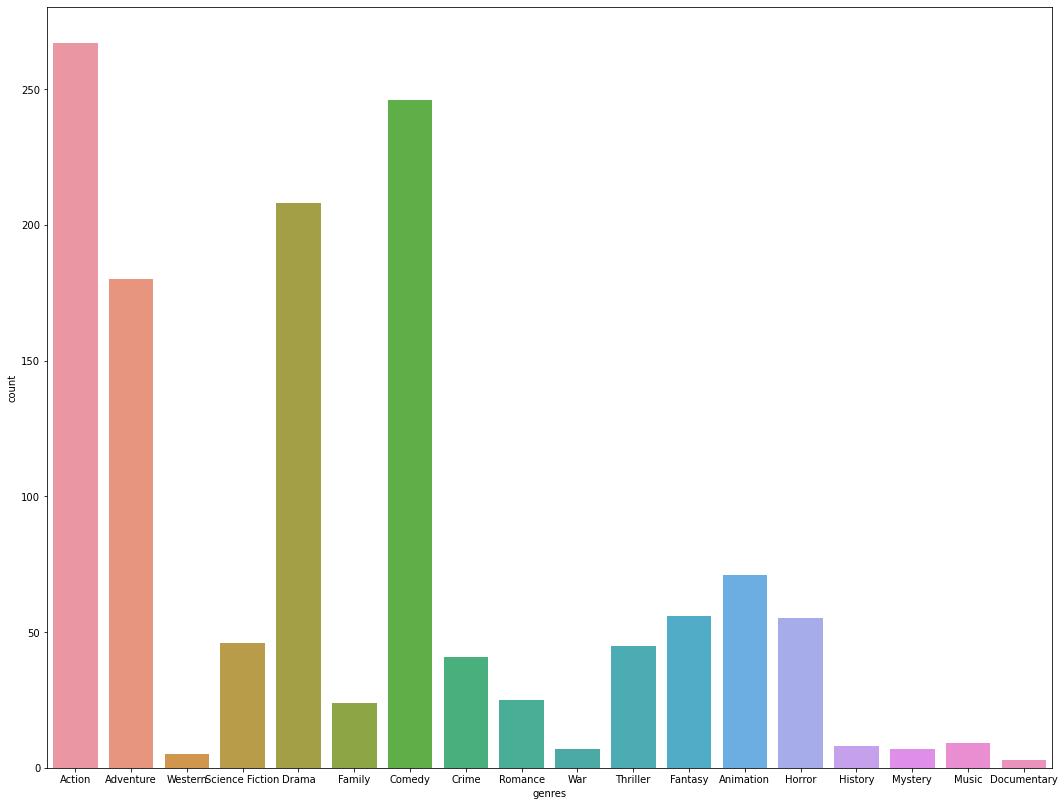

In [743]:
plt.figure(figsize=(18,14))
sns.countplot(x='genres', data=high_revenue)

#### 2.2 Popularity:  High revenue movies have popularity levels above the average

In [764]:
high_popularity = high_revenue.popularity.mean()

In [763]:
overall_popularity = df.popularity.mean()

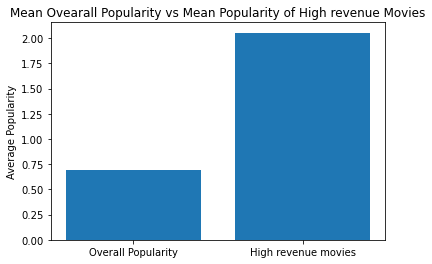

In [760]:
locations = [1, 2]
height = [overall_popularity, high_popularity]
labels = ['Overall Popularity', "High revenue movies"]
plt.bar(locations, height, tick_label=labels)
plt.title("Mean Ovearall Popularity vs Mean Popularity of High revenue Movies")
plt.ylabel('Average Popularity');

### 3. Top 20 Directors of high revenue movies:
- Steven Spielberg is the most frequent director on high revenue movies.

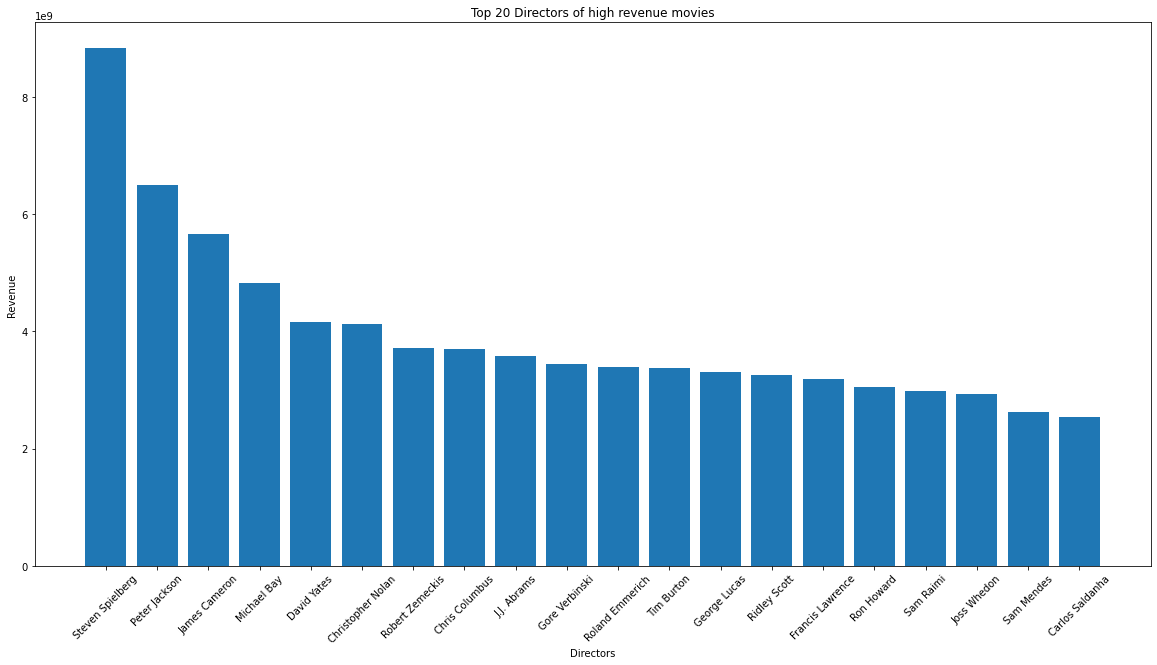

In [736]:
plt.subplots(figsize=(20,10))
plt.bar(top_20_directors.index, top_20_directors)
plt.title('Top 20 Directors of high revenue movies')
plt.xlabel('Directors')
plt.ylabel('Revenue')
plt.xticks(rotation = 45);

### 4. Top 20 Production Companies of High revenue movies:
- Universal Pictures taking the ovearall lead.

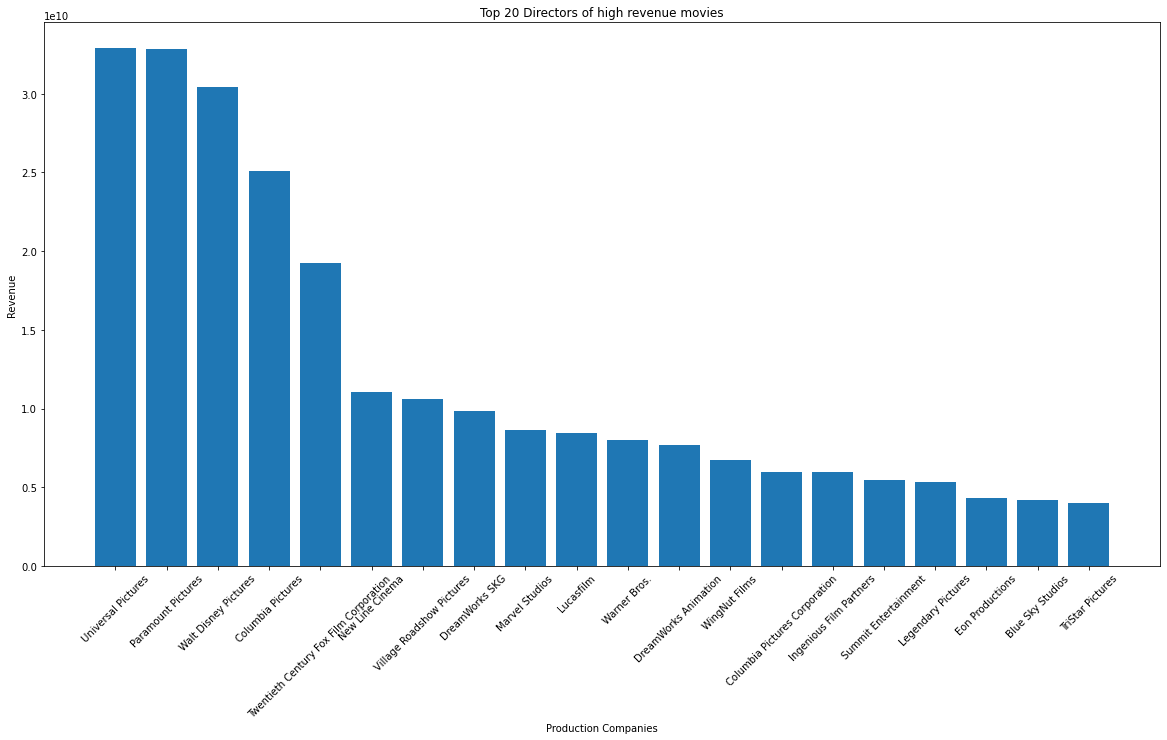

In [738]:
plt.subplots(figsize=(20,10))
plt.bar(top_20_production.index, top_20_production)
plt.title('Top 20 Directors of high revenue movies')
plt.xlabel('Production Companies')
plt.ylabel('Revenue')
plt.xticks(rotation = 45);